#**About Dataset:**

This dataset is an actual summary of the number of samples in the laboratory in individual months of the years 2009 - 2022.

Based on the collected data, I want to predict the number of samples in individual months in 2023.

I am going to analyze the trend of data using regression, using the example of forecasting the number of samples in the laboratory - predicting future data values using a method that combines trend analysis with seasonality analysis.

#Importing dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import plotly 
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.linalg import lstsq

#Importing data - reading EXCEL

In [2]:
data = pd.read_excel('//content/drive/MyDrive/sample_list.xls')

In [3]:
data

,YEAR,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,SUM
0,2009,358,341,345,357,275,391,283,287,331,310,324,347,3949
1,2010,303,385,366,322,363,361,299,317,283,366,381,277,4023
2,2011,295,441,628,408,434,544,495,689,525,573,630,706,6368
3,2012,764,779,889,760,702,819,877,878,803,874,806,692,9643
4,2013,867,689,852,845,858,897,1134,826,836,1021,955,994,10774
5,2014,933,863,983,996,962,952,1096,809,922,1056,905,1004,11481
6,2015,888,893,1042,1004,928,995,1030,967,1209,1083,1085,1104,12228
7,2016,942,923,1096,1012,1008,1087,966,940,1006,1005,1231,875,12091
8,2017,981,834,983,877,1112,1034,904,1093,838,1085,1001,894,11636
9,2018,885,816,933,956,1061,1015,901,901,969,1291,1251,800,11779


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YEAR    14 non-null     int64
 1   I       14 non-null     int64
 2   II      14 non-null     int64
 3   III     14 non-null     int64
 4   IV      14 non-null     int64
 5   V       14 non-null     int64
 6   VI      14 non-null     int64
 7   VII     14 non-null     int64
 8   VIII    14 non-null     int64
 9   IX      14 non-null     int64
 10  X       14 non-null     int64
 11  XI      14 non-null     int64
 12  XII     14 non-null     int64
 13  SUM     14 non-null     int64
dtypes: int64(14)
memory usage: 1.7 KB


The column names I - XII are individual months of the year.

# Exploratory Data Analysis

In [5]:
data.describe()

,YEAR,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,SUM
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2015.5000,769.500000,737.214286,850.571429,810.000000,840.071429,849.428571,870.000000,824.357143,828.928571,901.428571,886.785714,771.357143,9939.642857
std,4.1833,261.177143,198.818889,242.701372,269.039888,286.278902,238.471967,326.236347,244.581151,269.703103,292.970388,275.243159,229.750904,2953.084531
min,2009.0000,295.000000,341.000000,345.000000,322.000000,275.000000,361.000000,283.000000,287.000000,283.000000,310.000000,324.000000,277.000000,3949.000000
25%,2012.2500,749.000000,711.500000,851.250000,768.000000,741.000000,837.500000,835.750000,813.250000,811.250000,862.000000,827.000000,709.500000,9908.750000
50%,2015.5000,876.000000,811.000000,911.000000,861.000000,932.500000,953.000000,908.500000,889.500000,885.500000,990.500000,954.000000,800.000000,10833.000000
75%,2018.7500,939.750000,861.000000,983.000000,995.000000,1047.750000,991.750000,1014.000000,965.500000,998.500000,1076.250000,1015.250000,889.250000,11743.250000
max,2022.0000,1092.000000,923.000000,1130.000000,1210.000000,1121.000000,1087.000000,1505.000000,1093.000000,1209.000000,1291.000000,1251.000000,1104.000000,12811.000000


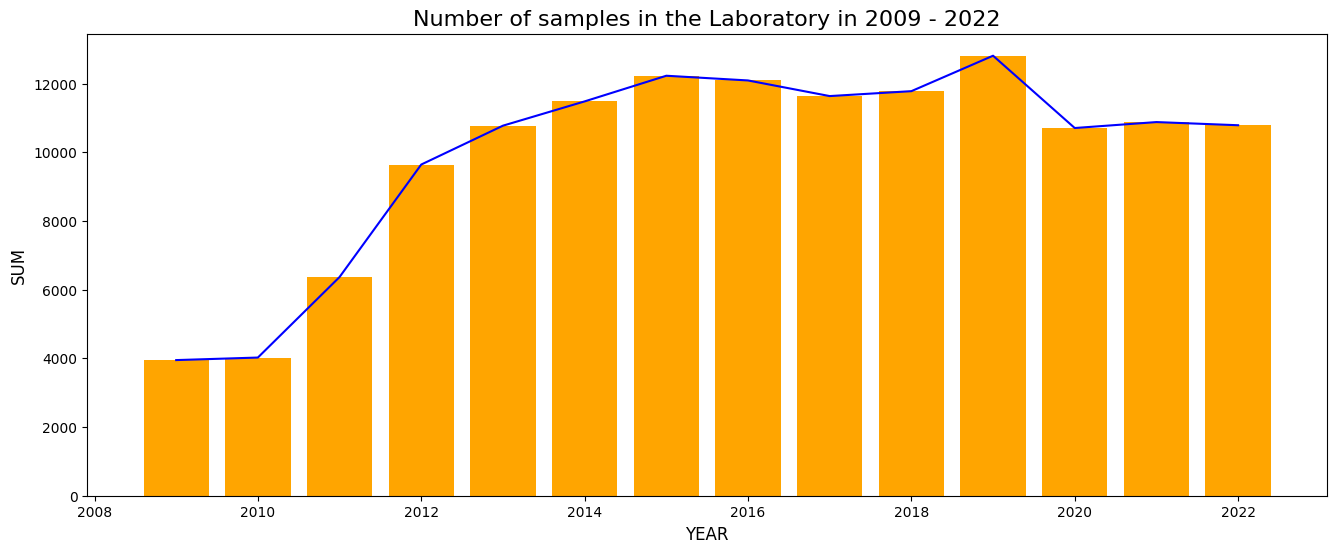

In [6]:
fig, ax=plt.subplots(figsize=(16,6))

ax.plot(data['YEAR'],data['SUM'] , linestyle ="-", color = 'blue')
ax.bar(data['YEAR'], data['SUM'], align='center', color="orange")
ax.set_xlabel('YEAR',fontsize=12)
ax.set_ylabel('SUM',fontsize=12)
#ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Number of samples in the Laboratory in 2009 - 2022', fontsize=16)

#plt.savefig('aqmLab.png')
plt.show()

**The sharp decrease in the number of samples after 2019 was caused by the outbreak of the Covid-19 pandemic.**

#Linear trend of the number of samples

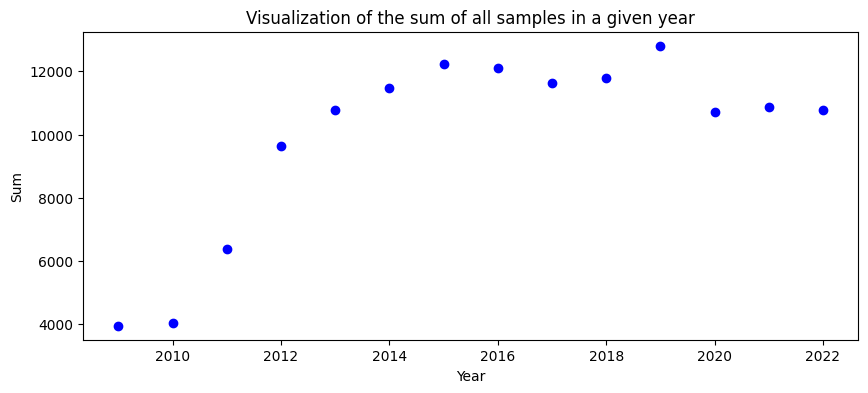

In [7]:
fig, ax = plt.subplots(figsize=(10,4))         
ax.scatter(x='YEAR', y='SUM', data=data, color='blue')
plt.title('Visualization of the sum of all samples in a given year')
plt.xlabel('Year')
plt.ylabel('Sum')
plt.show()

#Predicting future samples in the lab:

y=ax+b

number_of_samples = a * year + b                        

In [8]:
X = data[["YEAR"]]  
y = data['SUM']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_train, y_train)

0.4510464986126739

In [11]:
model.score(X_test, y_test)

0.4563603115070769

In [12]:
# a
model.coef_

array([467.74553039])

In [13]:
# b
model.intercept_

-932837.2818831946

In [14]:
model.predict(X).round(2)

array([ 6863.49,  7331.23,  7798.98,  8266.73,  8734.47,  9202.22,
        9669.96, 10137.71, 10605.45, 11073.2 , 11540.94, 12008.69,
       12476.44, 12944.18])

number_of_samples = year *model.coef + model.intercept

In [15]:
to_predict = pd.DataFrame(data =[2023], columns=['YEAR'])
predicted = model.predict(to_predict)
predicted

array([13411.9261025])

#Predicting number of samples in 2023:

In [16]:
number_of_samples = (int((2023 * model.coef_[0] + model.intercept_)))
number_of_samples

13411

#Visualization

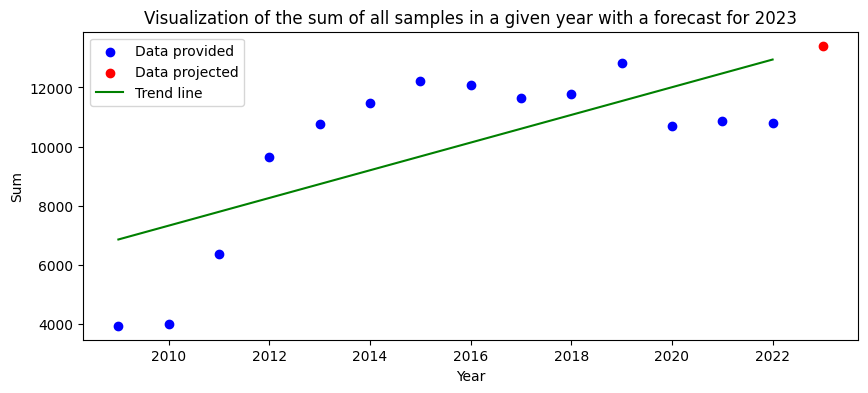

In [17]:
fig, ax = plt.subplots(figsize=(10,4))         
ax.scatter(x='YEAR', y='SUM', data=data, color='blue', label='Data provided') #data provided
ax.scatter(x=2023 , y=number_of_samples, color='red', label='Data projected') #data projected
ax.plot(X, model.predict(X), c='g', label='Trend line')  #trend line
plt.xlabel('Year')
plt.ylabel('Sum')
plt.title('Visualization of the sum of all samples in a given year with a forecast for 2023')
ax.legend()
plt.show()

#Forecasting the number of samples in a given month

In [18]:
data

,YEAR,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,SUM
0,2009,358,341,345,357,275,391,283,287,331,310,324,347,3949
1,2010,303,385,366,322,363,361,299,317,283,366,381,277,4023
2,2011,295,441,628,408,434,544,495,689,525,573,630,706,6368
3,2012,764,779,889,760,702,819,877,878,803,874,806,692,9643
4,2013,867,689,852,845,858,897,1134,826,836,1021,955,994,10774
5,2014,933,863,983,996,962,952,1096,809,922,1056,905,1004,11481
6,2015,888,893,1042,1004,928,995,1030,967,1209,1083,1085,1104,12228
7,2016,942,923,1096,1012,1008,1087,966,940,1006,1005,1231,875,12091
8,2017,981,834,983,877,1112,1034,904,1093,838,1085,1001,894,11636
9,2018,885,816,933,956,1061,1015,901,901,969,1291,1251,800,11779


In [19]:
samples = (data.iloc[: , [1,2,3,4,5,6,7,8,9,10,11,12]])
samples

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
0,358,341,345,357,275,391,283,287,331,310,324,347
1,303,385,366,322,363,361,299,317,283,366,381,277
2,295,441,628,408,434,544,495,689,525,573,630,706
3,764,779,889,760,702,819,877,878,803,874,806,692
4,867,689,852,845,858,897,1134,826,836,1021,955,994
5,933,863,983,996,962,952,1096,809,922,1056,905,1004
6,888,893,1042,1004,928,995,1030,967,1209,1083,1085,1104
7,942,923,1096,1012,1008,1087,966,940,1006,1005,1231,875
8,981,834,983,877,1112,1034,904,1093,838,1085,1001,894
9,885,816,933,956,1061,1015,901,901,969,1291,1251,800


In [20]:
sampless = np.array(samples).reshape(168,)
sampless

array([ 358,  341,  345,  357,  275,  391,  283,  287,  331,  310,  324,
        347,  303,  385,  366,  322,  363,  361,  299,  317,  283,  366,
        381,  277,  295,  441,  628,  408,  434,  544,  495,  689,  525,
        573,  630,  706,  764,  779,  889,  760,  702,  819,  877,  878,
        803,  874,  806,  692,  867,  689,  852,  845,  858,  897, 1134,
        826,  836, 1021,  955,  994,  933,  863,  983,  996,  962,  952,
       1096,  809,  922, 1056,  905, 1004,  888,  893, 1042, 1004,  928,
        995, 1030,  967, 1209, 1083, 1085, 1104,  942,  923, 1096, 1012,
       1008, 1087,  966,  940, 1006, 1005, 1231,  875,  981,  834,  983,
        877, 1112, 1034,  904, 1093,  838, 1085, 1001,  894,  885,  816,
        933,  956, 1061, 1015,  901,  901,  969, 1291, 1251,  800, 1092,
        910, 1130, 1210, 1121,  893, 1505,  961, 1041, 1211,  890,  847,
        948,  855,  851,  792,  897,  954,  913,  830, 1017,  976,  953,
        720,  744,  806,  933,  809, 1103,  982,  9

In [21]:
sampless.shape

(168,)

In [22]:
months = []
for i in range(1, 13):
    a= i
    months.append(a)
months


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
years=[]
for i in range(1, 13):
  for x in data['YEAR']:
    
    year = x + (i-1)/12
    years.append(year)
years.sort()
years

In [24]:
year = np.array(years)
year

array([2009.        , 2009.08333333, 2009.16666667, 2009.25      ,
       2009.33333333, 2009.41666667, 2009.5       , 2009.58333333,
       2009.66666667, 2009.75      , 2009.83333333, 2009.91666667,
       2010.        , 2010.08333333, 2010.16666667, 2010.25      ,
       2010.33333333, 2010.41666667, 2010.5       , 2010.58333333,
       2010.66666667, 2010.75      , 2010.83333333, 2010.91666667,
       2011.        , 2011.08333333, 2011.16666667, 2011.25      ,
       2011.33333333, 2011.41666667, 2011.5       , 2011.58333333,
       2011.66666667, 2011.75      , 2011.83333333, 2011.91666667,
       2012.        , 2012.08333333, 2012.16666667, 2012.25      ,
       2012.33333333, 2012.41666667, 2012.5       , 2012.58333333,
       2012.66666667, 2012.75      , 2012.83333333, 2012.91666667,
       2013.        , 2013.08333333, 2013.16666667, 2013.25      ,
       2013.33333333, 2013.41666667, 2013.5       , 2013.58333333,
       2013.66666667, 2013.75      , 2013.83333333, 2013.91666

In [25]:
year.shape

(168,)

In [26]:
M = year[:, np.newaxis]**[0, 1]
model,_,_, _=lstsq(M, sampless)
print('a=', model[1])
print('b=', model[0])

a= 42.45232105526886
b= -84753.80682928287


#Trend line

y=ax+b

*   number_of_samples = 42,45*time -84753,81
*   where time = year + (month-1)/12


number_of_samples(year,mmonth) = 42.45*(year+(month-1)/12) - 84753.81

In [30]:
#example
number_of_samples_2009_I=(int(42.45*(2009+(1-1)/12) - 84753.81))
number_of_samples_2009_I

528

In [31]:
#example
number_of_samples_2009_XII=(int(42.45*(2009+(12-1)/12) - 84753.81))
number_of_samples_2009_XII

567

**Number of samples according to trend line**

In [29]:
nr_of_samples_according_to_trend_line=[]
for i in range(1, 13):
  for x in data['YEAR']:
    
    number_of_samples = 42.45*(x+(i-1)/12) - 84753.81
    nr_of_samples_according_to_trend_line.append(number_of_samples)
#nr_of_samples_according_to_trend_line

df = pd.DataFrame({'January':nr_of_samples_according_to_trend_line[0:14],
                  'February':nr_of_samples_according_to_trend_line[14:28],
                   'March':nr_of_samples_according_to_trend_line[28:42],
                   'April':nr_of_samples_according_to_trend_line[42:56],
                   'May':nr_of_samples_according_to_trend_line[56:70],
                   'June':nr_of_samples_according_to_trend_line[70:84],
                   'July':nr_of_samples_according_to_trend_line[84:98],
                   'August':nr_of_samples_according_to_trend_line[98:112],
                   'September':nr_of_samples_according_to_trend_line[112:126],
                   'October':nr_of_samples_according_to_trend_line[126:140],
                   'November':nr_of_samples_according_to_trend_line[140:154],
                   'December':nr_of_samples_according_to_trend_line[154:168]})
df= df.astype(int)
df   

,January,February,March,April,May,June,July,August,September,October,November,December
0,528,531,535,538,542,545,549,553,556,560,563,567
1,570,574,577,581,584,588,591,595,598,602,606,609
2,613,616,620,623,627,630,634,637,641,644,648,652
3,655,659,662,666,669,673,676,680,683,687,690,694
4,698,701,705,708,712,715,719,722,726,729,733,736
5,740,744,747,751,754,758,761,765,768,772,775,779
6,782,786,790,793,797,800,804,807,811,814,818,821
7,825,828,832,836,839,843,846,850,853,857,860,864
8,867,871,874,878,881,885,889,892,896,899,903,906
9,910,913,917,920,924,927,931,935,938,942,945,949


#Linear trend of the number of samples

**Data provided**

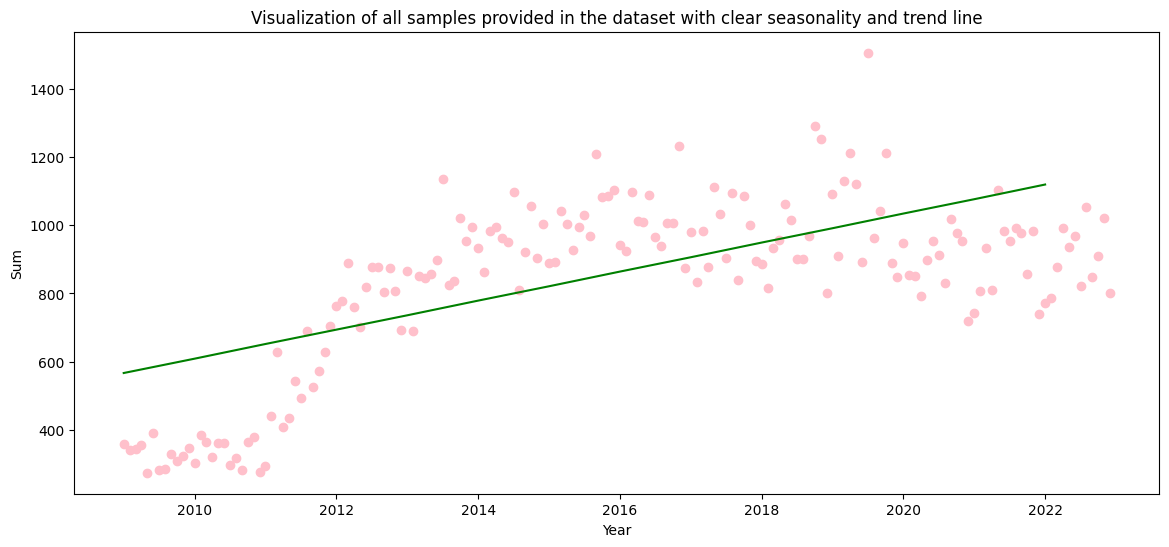

In [32]:
fig, ax = plt.subplots(figsize=(14,6))       
ax.scatter(year, sampless, color='pink') #data provided

ax.plot(X,df['December'], c='g')  #trend line

plt.xlabel('Year')
plt.ylabel('Sum')
plt.title('Visualization of all samples provided in the dataset with clear seasonality and trend line')
plt.show()

#Seasonality analysis

In [33]:
season = pd.merge(data, df, left_index=True, right_index=True)
season

,YEAR,I,II,III,IV,V,VI,VII,VIII,IX,...,March,April,May,June,July,August,September,October,November,December
0,2009,358,341,345,357,275,391,283,287,331,...,535,538,542,545,549,553,556,560,563,567
1,2010,303,385,366,322,363,361,299,317,283,...,577,581,584,588,591,595,598,602,606,609
2,2011,295,441,628,408,434,544,495,689,525,...,620,623,627,630,634,637,641,644,648,652
3,2012,764,779,889,760,702,819,877,878,803,...,662,666,669,673,676,680,683,687,690,694
4,2013,867,689,852,845,858,897,1134,826,836,...,705,708,712,715,719,722,726,729,733,736
5,2014,933,863,983,996,962,952,1096,809,922,...,747,751,754,758,761,765,768,772,775,779
6,2015,888,893,1042,1004,928,995,1030,967,1209,...,790,793,797,800,804,807,811,814,818,821
7,2016,942,923,1096,1012,1008,1087,966,940,1006,...,832,836,839,843,846,850,853,857,860,864
8,2017,981,834,983,877,1112,1034,904,1093,838,...,874,878,881,885,889,892,896,899,903,906
9,2018,885,816,933,956,1061,1015,901,901,969,...,917,920,924,927,931,935,938,942,945,949


In [34]:
season.drop(['SUM'], axis=1)

,YEAR,I,II,III,IV,V,VI,VII,VIII,IX,...,March,April,May,June,July,August,September,October,November,December
0,2009,358,341,345,357,275,391,283,287,331,...,535,538,542,545,549,553,556,560,563,567
1,2010,303,385,366,322,363,361,299,317,283,...,577,581,584,588,591,595,598,602,606,609
2,2011,295,441,628,408,434,544,495,689,525,...,620,623,627,630,634,637,641,644,648,652
3,2012,764,779,889,760,702,819,877,878,803,...,662,666,669,673,676,680,683,687,690,694
4,2013,867,689,852,845,858,897,1134,826,836,...,705,708,712,715,719,722,726,729,733,736
5,2014,933,863,983,996,962,952,1096,809,922,...,747,751,754,758,761,765,768,772,775,779
6,2015,888,893,1042,1004,928,995,1030,967,1209,...,790,793,797,800,804,807,811,814,818,821
7,2016,942,923,1096,1012,1008,1087,966,940,1006,...,832,836,839,843,846,850,853,857,860,864
8,2017,981,834,983,877,1112,1034,904,1093,838,...,874,878,881,885,889,892,896,899,903,906
9,2018,885,816,933,956,1061,1015,901,901,969,...,917,920,924,927,931,935,938,942,945,949


**A list of columns of individual months next to each other**

In [35]:
season = season[['YEAR','I','January','II','February','III', 'March','IV','April','V', 'May','VI', 'June','VII', 'July','VIII', 'August',
                'IX', 'September','X', 'October','XI', 'November','XII', 'December']]
season


,YEAR,I,January,II,February,III,March,IV,April,V,...,VIII,August,IX,September,X,October,XI,November,XII,December
0,2009,358,528,341,531,345,535,357,538,275,...,287,553,331,556,310,560,324,563,347,567
1,2010,303,570,385,574,366,577,322,581,363,...,317,595,283,598,366,602,381,606,277,609
2,2011,295,613,441,616,628,620,408,623,434,...,689,637,525,641,573,644,630,648,706,652
3,2012,764,655,779,659,889,662,760,666,702,...,878,680,803,683,874,687,806,690,692,694
4,2013,867,698,689,701,852,705,845,708,858,...,826,722,836,726,1021,729,955,733,994,736
5,2014,933,740,863,744,983,747,996,751,962,...,809,765,922,768,1056,772,905,775,1004,779
6,2015,888,782,893,786,1042,790,1004,793,928,...,967,807,1209,811,1083,814,1085,818,1104,821
7,2016,942,825,923,828,1096,832,1012,836,1008,...,940,850,1006,853,1005,857,1231,860,875,864
8,2017,981,867,834,871,983,874,877,878,1112,...,1093,892,838,896,1085,899,1001,903,894,906
9,2018,885,910,816,913,933,917,956,920,1061,...,901,935,969,938,1291,942,1251,945,800,949


**Calculation of the difference between the actual number of samples and the number of samples resulting from the linear trend**

In [36]:
sub_I = []      #sub == subtraction (difference)
sub_II = []
sub_III = []
sub_IV = []
sub_V = []
sub_VI = []
sub_VII = []
sub_VIII = []
sub_IX = []
sub_X = []
sub_XI = []
sub_XII = []

for i in range(len(season[('I')])):

     a = season[('I')].iloc[i] - season[('January')].iloc[i]
     sub_I.append(a) 
     b = season[('II')].iloc[i] - season[('February')].iloc[i]
     sub_II.append(b)   
     c = season[('III')].iloc[i] - season[('March')].iloc[i]
     sub_III.append(c) 
     d = season[('IV')].iloc[i] - season[('April')].iloc[i]
     sub_IV.append(d) 
     e = season[('V')].iloc[i] - season[('May')].iloc[i]
     sub_V.append(e)
     f = season[('VI')].iloc[i] - season[('June')].iloc[i]
     sub_VI.append(f)
     g = season[('VII')].iloc[i] - season[('July')].iloc[i]
     sub_VII.append(g) 
     h = season[('VIII')].iloc[i] - season[('August')].iloc[i]
     sub_VIII.append(h)      
     j = season[('IX')].iloc[i] - season[('September')].iloc[i]
     sub_IX.append(j) 
     k = season[('X')].iloc[i] - season[('October')].iloc[i]
     sub_X.append(k)       
     l = season[('XI')].iloc[i] - season[('November')].iloc[i]
     sub_XI.append(l)
     m = season[('XII')].iloc[i] - season[('December')].iloc[i]
     sub_XII.append(m)
season.insert(3,'subtraction_I', sub_I)
season.insert(6,'subtraction_II', sub_II)
season.insert(9,'subtraction_III', sub_III)
season.insert(12,'subtraction_IV', sub_IV)
season.insert(15,'subtraction_V', sub_V)
season.insert(18,'subtraction_VI', sub_VI)
season.insert(21,'subtraction_VII', sub_VII)
season.insert(24,'subtraction_VIII', sub_VIII)
season.insert(27,'subtraction_IX', sub_IX)
season.insert(30,'subtraction_X', sub_X)
season.insert(33,'subtraction_XI', sub_XI)
season.insert(36,'subtraction_XII', sub_XII)
season

,YEAR,I,January,subtraction_I,II,February,subtraction_II,III,March,subtraction_III,...,subtraction_IX,X,October,subtraction_X,XI,November,subtraction_XI,XII,December,subtraction_XII
0,2009,358,528,-170,341,531,-190,345,535,-190,...,-225,310,560,-250,324,563,-239,347,567,-220
1,2010,303,570,-267,385,574,-189,366,577,-211,...,-315,366,602,-236,381,606,-225,277,609,-332
2,2011,295,613,-318,441,616,-175,628,620,8,...,-116,573,644,-71,630,648,-18,706,652,54
3,2012,764,655,109,779,659,120,889,662,227,...,120,874,687,187,806,690,116,692,694,-2
4,2013,867,698,169,689,701,-12,852,705,147,...,110,1021,729,292,955,733,222,994,736,258
5,2014,933,740,193,863,744,119,983,747,236,...,154,1056,772,284,905,775,130,1004,779,225
6,2015,888,782,106,893,786,107,1042,790,252,...,398,1083,814,269,1085,818,267,1104,821,283
7,2016,942,825,117,923,828,95,1096,832,264,...,153,1005,857,148,1231,860,371,875,864,11
8,2017,981,867,114,834,871,-37,983,874,109,...,-58,1085,899,186,1001,903,98,894,906,-12
9,2018,885,910,-25,816,913,-97,933,917,16,...,31,1291,942,349,1251,945,306,800,949,-149


#Trend line enriched with average difference (month)

y=ax+b


*   number_of_samples = 42,45*time -84753,81
*   where time = year + (month-1)/12

*   number_of_samples(year,mmonth) = 42.45*(year+(month-1)/12) - 84753.81


number_of_samples(year,mmonth) = 42.45*(year+(month-1)/12) - 84753.81 + average difference(month)

In [37]:
col_mean = ['subtraction_I','subtraction_II','subtraction_III','subtraction_IV','subtraction_V','subtraction_VI','subtraction_VII','subtraction_VIII',
            'subtraction_IX','subtraction_X','subtraction_XI','subtraction_XII'] 
for col in col_mean:
    print(f'Mean_ {col}:', season[col].mean().round(2))

Mean_ subtraction_I: -34.21
Mean_ subtraction_II: -70.0
Mean_ subtraction_III: 39.79
Mean_ subtraction_IV: -4.29
Mean_ subtraction_V: 22.29
Mean_ subtraction_VI: 28.14
Mean_ subtraction_VII: 45.14
Mean_ subtraction_VIII: -4.07
Mean_ subtraction_IX: -3.0
Mean_ subtraction_X: 65.93
Mean_ subtraction_XI: 47.71
Mean_ subtraction_XII: -71.29


#Forecasted number of samples for individual months in 2023

In [ ]:
#number_of_samples(year,mmonth) = 42.45*(year+(month-1)/12) - 84753.81 + average difference(month)

In [38]:
number_of_samples_in_2023=[]
for i in range(1, 13):
  x=2023
  for col in col_mean:
    
    number_of_samples = (int(42.45*(x+(i-1)/12) - 84753.81 + season[col].mean()))
    
    number_of_samples_in_2023.append(number_of_samples)
#number_of_samples_in_2023

prediction = pd.DataFrame({'January':number_of_samples_in_2023[0],  #trzeba z pętelki wybrać co 13 element, aby mieć tylko wyniki danego miesiąca
                    'February':number_of_samples_in_2023[13],
                   'March':number_of_samples_in_2023[26],
                   'April':number_of_samples_in_2023[39],
                   'May':number_of_samples_in_2023[52],
                   'June':number_of_samples_in_2023[65],
                   'July':number_of_samples_in_2023[78],
                   'August':number_of_samples_in_2023[91],
                   'September':number_of_samples_in_2023[104],
                   'October':number_of_samples_in_2023[117],
                   'November':number_of_samples_in_2023[130],
                   'December':number_of_samples_in_2023[143]}, index=[2023])
prediction= prediction.astype(int)
prediction['Sum']=prediction.iloc[0].sum()
prediction   

,January,February,March,April,May,June,July,August,September,October,November,December,Sum
2023,1088,1056,1169,1128,1158,1168,1188,1143,1147,1220,1205,1090,13760


##**Another way to calculate the expected number of samples in individual months in 2023**

In [39]:
January_2023 = (int(42.45*(2023+(1-1)/12) - 84753.81 + season['subtraction_I'].mean()))

February_2023 = (int(42.45*(2023+(2-1)/12) - 84753.81 + season['subtraction_II'].mean()))

March_2023 = (int(42.45*(2023+(3-1)/12) - 84753.81 + season['subtraction_III'].mean()))

April_2023 = (int(42.45*(2023+(4-1)/12) - 84753.81 + season['subtraction_IV'].mean()))

May_2023 = (int(42.45*(2023+(5-1)/12) - 84753.81 + season['subtraction_V'].mean()))

June_2023 = (int(42.45*(2023+(6-1)/12) - 84753.81 + season['subtraction_VI'].mean()))

July_2023 = (int(42.45*(2023+(7-1)/12) - 84753.81 + season['subtraction_VII'].mean()))

August_2023 = (int(42.45*(2023+(8-1)/12) - 84753.81 + season['subtraction_VIII'].mean()))

September_2023 = (int(42.45*(2023+(9-1)/12) - 84753.81 + season['subtraction_IX'].mean()))

October_2023 = (int(42.45*(2023+(10-1)/12) - 84753.81 + season['subtraction_X'].mean()))

November_2023 = (int(42.45*(2023+(11-1)/12) - 84753.81 + season['subtraction_XI'].mean()))

December_2023 = (int(42.45*(2023+(12-1)/12) - 84753.81 + season['subtraction_XII'].mean()))

predictions = pd.DataFrame({'January':January_2023, 
                    'February':February_2023,
                   'March':March_2023,
                   'April':April_2023,
                   'May':May_2023,
                   'June':June_2023,
                   'July':July_2023,
                   'August':August_2023,
                   'September':September_2023,
                   'October':October_2023,
                   'November':November_2023,
                   'December':December_2023}, index=[2023])
predictions= predictions.astype(int)
predictions['Sum']=predictions.iloc[0].sum()
predictions 

,January,February,March,April,May,June,July,August,September,October,November,December,Sum
2023,1088,1056,1169,1128,1158,1168,1188,1143,1147,1220,1205,1090,13760


#Visualization

In [40]:
year_2023 =[]
d= 2023
for i in range(1, 13):

    yearr = d + (i-1)/12
    year_2023.append(yearr)
year_2023.sort()

year2023 = np.array(year_2023)
year2023

array([2023.        , 2023.08333333, 2023.16666667, 2023.25      ,
       2023.33333333, 2023.41666667, 2023.5       , 2023.58333333,
       2023.66666667, 2023.75      , 2023.83333333, 2023.91666667])

In [41]:
year2023.shape

(12,)

In [42]:
prediction = prediction.drop('Sum', axis=1)
prediction

,January,February,March,April,May,June,July,August,September,October,November,December
2023,1088,1056,1169,1128,1158,1168,1188,1143,1147,1220,1205,1090


In [43]:
prediction.shape

(1, 12)

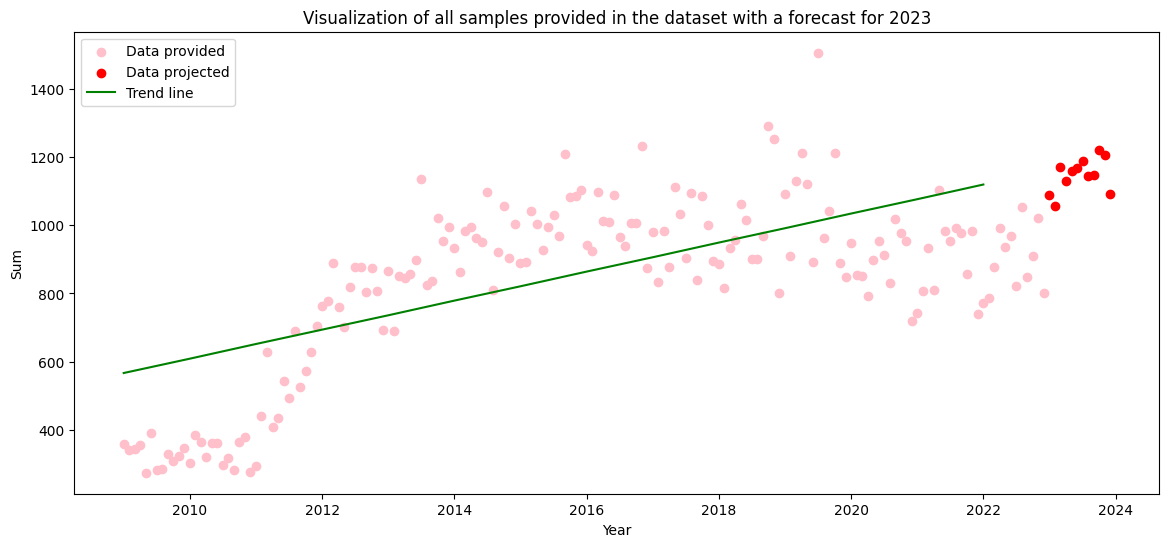

In [44]:
fig, ax = plt.subplots(figsize=(14,6))       
ax.scatter(year, sampless, color='pink', label='Data provided') #data provided
ax.scatter(year2023, prediction, color='red', label='Data projected')  #data projected
ax.plot(X,df['December'], c='g', label='Trend line')  #trend line

plt.xlabel('Year')
plt.ylabel('Sum')
plt.title('Visualization of all samples provided in the dataset with a forecast for 2023')
ax.legend(loc='upper left')
plt.show()
